In [2]:
import pandas as pd

def process_packet_times(file_path):
    """
    Reads a .txt file with packet processing times and converts the times to milliseconds.
    Returns a pandas Series.
    """
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    # Extract the seconds value from each line and convert to milliseconds
    ms_times = [float(line.split(": ")[-1].split()[0]) * 1000 for line in lines]
    
    # Create and return a pandas Series
    return pd.Series(ms_times, name="Packet Processing Time (ms)")

# Example usage (uncomment and replace 'path_to_file.txt' with your file path to test)
# processed_series = process_packet_times('path_to_file.txt')
# processed_series


In [4]:
endhost_ms = process_packet_times("./endhost_data.txt")

In [5]:
endhost_ms

0       0.726
1       0.321
2       0.231
3       0.220
4       0.098
        ...  
123     0.397
124     0.243
125     0.404
126    21.332
127     0.405
Name: Packet Processing Time (ms), Length: 128, dtype: float64

In [8]:
def remove_outliers(series, method='iqr', z_threshold=3):
    """
    Removes outliers from a pandas Series using the specified method.

    Parameters:
    series (pd.Series): The input Series containing numeric values.
    method (str): The method to detect outliers ('iqr' or 'zscore').
    z_threshold (float): The z-score threshold for outlier removal (used if method='zscore').

    Returns:
    pd.Series: The Series with outliers removed.
    """
    if method == 'iqr':
        # Interquartile Range (IQR) method
        q1 = series.quantile(0.25)
        q3 = series.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        return series[(series >= lower_bound) & (series <= upper_bound)]
    elif method == 'zscore':
        # Z-score method
        mean = series.mean()
        std = series.std()
        z_scores = (series - mean) / std
        return series[abs(z_scores) <= z_threshold]
    else:
        raise ValueError("Invalid method. Choose 'iqr' or 'zscore'.")

# Example usage
# cleaned_series = remove_outliers(processed_series, method='iqr')


In [10]:
endhost_ms = remove_outliers(endhost_ms)

In [46]:
import matplotlib.pyplot as plt

def plot_packet_latency(latency_series, title='Packet Latency Over Time'):
    """
    Plots packet latency over time.
    
    Parameters:
    latency_series (pd.Series): A pandas Series where the index represents the time steps and
                                the values represent latency in milliseconds.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(latency_series.index, latency_series.values, marker='o', linestyle='-', label='Latency (ms)')
    plt.title(f'{title}')
    plt.xlabel('Time Step')
    plt.ylabel('Latency (ms)')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example usage (uncomment and ensure you have a pandas Series to test)
# plot_packet_latency(processed_series)


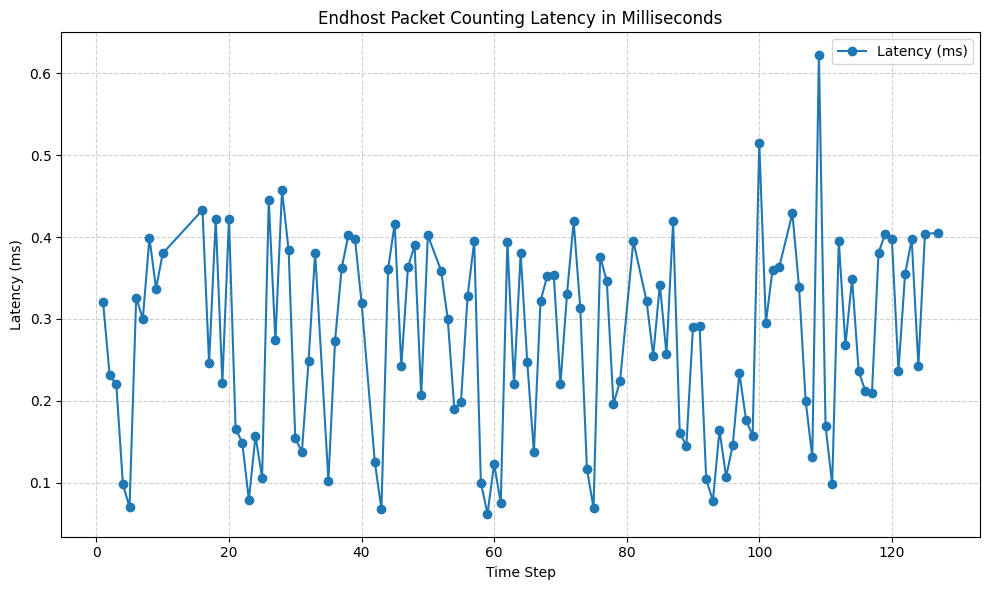

In [52]:
plot_packet_latency(endhost_ms, title="Endhost Packet Counting Latency in Milliseconds")

In [32]:
endhost_ms.mean()

np.float64(0.2748086956521739)

In [33]:
endhost_ms.var()

np.float64(0.014232963081617088)

In [34]:
endhost_ms.std()

np.float64(0.1193019827229082)

# P4:

In [54]:
p4_ms = [85225, 57288, 87534, 92455, 75480, 119654, 72604, 52076, 47016, 96808, 52634, 28808, 41514, 32454, 48163, 45890, 47169, 44165, 56095, 44686, 15823, 16544, 103146, 136731, 26353, 26458, 80456, 130102, 117388, 63720, 9297, 13794, 106951, 83267, 46038, 39137, 52388, 41709, 57025, 41719, 13062, 13897, 48947, 40247, 45820, 44469, 29109, 21558, 12793, 12499, 81091, 76224, 56689, 22157, 45935, 39908, 42423, 64022, 71544, 38164, 35368, 38868, 46143, 38960, 52742, 22372, 66541, 38370, 47855, 38768, 33982, 36958, 88771, 213239, 90851, 86913, 46940, 12663, 41795, 30603, 43945, 40072, 53172, 40206, 40705, 56464, 51478, 39023, 82059, 39527, 53008, 28197, 15297, 27898, 33945, 20126, 50996, 36747, 57242, 38168, 43825, 46242, 45482, 41064, 43180, 38119, 38853, 44749, 41310, 42403, 45794, 44522, 41085, 41924, 52926, 36513, 79483, 73273, 86336, 36601, 39634, 14990, 54339, 37232, 46153, 82919, 46425, 36937, 48208, 38908, 44228, 39503, 66888, 51883, 11171, 10944, 49677, 16474, 61093, 31504, 38818, 55110, 33681, 24598, 46055, 44833, 41647, 23483, 48440, 28719, 55931, 22564, 72843, 24680, 37480, 33511, 43532, 35845, 39825, 43355, 104042, 56808, 63039, 41793, 50581, 51984, 48110, 38193, 48886, 42677, 64243, 44993, 50251, 52480, 46729, 37247, 42227, 26870, 54678, 40146, 40918, 55450, 71240, 95776, 38524, 41894, 62730, 46796, 44306, 51260, 46702, 42175, 43781, 42754, 43015, 12163, 27992, 22971, 41072, 35024, 45625, 43201, 55744, 41257, 89497, 92993, 47926, 36430, 40034, 28425, 48752, 36874, 26792, 19569, 89014, 51392, 45111, 44610, 55662, 42985, 49309, 59961, 13345, 13416, 38454, 36045, 67369, 41990, 45002, 64887, 40425, 37667, 40841, 38120, 122530, 54878, 50653, 56327, 47930, 22959, 26220, 41561, 46714, 43083, 43975, 60845, 44453, 23485, 80914, 86698, 33751, 31301, 40451, 35924, 37169, 99419, 46449, 36028, 26727, 21881, 37786, 42239, 39706, 38232, 50706, 46244, 68831, 37042, 26031, 59878, 62554, 136417, 43173, 22791, 68362, 60093, 50232, 62607, 13600, 34240, 17314, 13853, 25988, 42544, 41674, 67478, 54471, 40985, 50663, 37325, 58001, 39203, 75028, 19540, 79889, 132465, 48287, 38574, 51303, 30656, 43219, 56631, 42150, 37488, 43641, 43497, 61911, 40380, 30438, 34984, 39549, 39921, 58382, 25793, 9509, 45507, 40933, 22072, 24137, 13053, 44551, 36185, 57951, 44915, 45606, 57430, 63979, 39199, 51165, 41415, 29455, 29137, 43757, 26148, 89900, 74444, 87602, 62837, 61825, 20952, 38561, 55879, 43000, 44166, 47673, 39848, 64525, 26629, 43470, 59325, 41914, 31119, 12556, 10744, 43639, 67397, 101234, 128667, 74690, 103157, 30414, 14471, 87883, 41833, 46223, 62395, 46241, 42910, 41145, 50095, 35646, 36881, 52428, 29649, 52806, 56494, 63928, 53973, 77616, 16169, 37826, 33389, 36796, 23258, 77604, 31095, 90667, 33058, 64553, 31390, 64766, 52147, 23949, 13360, 40276, 37927, 43034, 24970, 57077, 40474, 111175, 69379, 40087, 35361, 43462, 36521, 51369, 40406, 40100, 41322, 43176, 57928, 82924, 34581, 41991, 39352, 56800, 31528, 43452, 56252, 12191, 13116, 93164, 105076, 39743, 27821, 26994, 24000, 41570, 24363, 39413, 37241, 81382, 39245, 14757, 12334, 15634, 12562, 53529, 29981, 61389, 39472, 39880, 53981, 28398, 35006, 53581, 45070, 56355, 40875, 42763, 61387, 44934, 11475, 53254, 47202, 59339, 37239, 40666, 43193, 39950, 24329, 47179, 48306, 51205, 59808, 58395, 41013, 38368, 55891, 12007, 37397, 41809, 36564, 42354, 43246, 40530, 20557, 45744, 41118, 41661, 38848, 44717, 49774, 41739, 69959, 92906, 76206, 40125, 34006, 56276, 41922, 36187, 58419, 38660, 40189, 51045, 40327, 68396, 27037, 42580, 57252, 41607, 39593, 41374, 26358, 49123, 58779, 85949, 63094, 41305, 35380, 22190, 36781, 42412, 53964, 45665, 77271, 39880, 40699, 44358, 36516, 44612, 38693, 43933, 26386, 52429, 40889, 39417, 38151, 49143, 66153, 38420, 38802, 37298, 38348, 50962, 45141, 56434, 41220, 38821, 51341, 47599, 25391, 48937, 36567, 66364, 37255, 40550, 64145, 41383, 36843, 101410, 89084, 11859, 26004, 33303, 36714, 39883, 37729, 7914, 7972, 22941, 19988, 44974, 14852, 76910, 54424, 39663, 24062, 62488, 26261, 35122, 24882, 86786, 20153, 42204, 36569, 55095, 36340, 49164, 54741, 24170, 40015, 39781, 26134, 71614, 45768, 39780, 58636, 43245, 25885, 37806, 35040, 52783, 96830, 51334, 39199, 39371, 28744, 39595, 46998, 54437, 31394, 47166, 43880, 56427, 58688, 41062, 45171, 41457, 42490, 53670, 38802, 45700, 54371, 40549, 30738, 46644, 41203, 53358, 23089, 37974, 52102, 39610, 43426, 43451, 20419, 54793, 40540, 37558, 56476, 44448, 19478, 12901, 25967, 47568, 106432, 52088, 75138, 28697, 23361, 39499, 23334, 44135, 43394, 83204, 46665, 34979, 37776, 45903, 39550, 41248, 22710, 32563, 12792, 42967, 60749, 29563, 33119, 37212, 38735, 54189, 41203, 38346, 53602, 52451, 45524, 46983, 43561, 61837, 25601, 39627, 54147, 24938, 18650, 47860, 44406, 43214, 35169, 76159, 113020, 45907, 38720, 30505, 12848, 65635, 35693, 20234, 34222, 43439, 42647, 38220, 22245, 40749, 20524, 56958, 46823, 80291, 28151, 11223, 11011, 105518, 100718, 43463, 43599, 54645, 58538, 21658, 24560, 45573, 38985, 39882, 55269, 44066, 20176, 47305, 43821, 75847, 20210, 41634, 46968, 39105, 42000, 98888, 89045, 47352, 35326, 23670, 60489, 40835, 43341, 42817, 42452, 55254, 13846, 46982, 108617, 40597, 28696, 39437, 30742, 47670, 38204, 44020, 59782, 51541, 84541, 11608, 10854, 47142, 41573, 68681]

In [55]:
def convert_microseconds_to_ms(data_list):
    """
    Converts a list of time values from nanoseconds (ns) to milliseconds (ms).
    
    Parameters:
    data_list (list of int): List of time values in nanoseconds.
    
    Returns:
    pd.Series: A pandas Series with time values in milliseconds.
    """
    # Convert nanoseconds to milliseconds
    ms_series = pd.Series(data_list) / 1000
    ms_series.name = "Latency (ms)"
    return ms_series

p4_ms = convert_microseconds_to_ms(p4_ms[:120])

In [56]:
p4_ms

0      85.225
1      57.288
2      87.534
3      92.455
4      75.480
        ...  
115    36.513
116    79.483
117    73.273
118    86.336
119    36.601
Name: Latency (ms), Length: 120, dtype: float64

In [57]:
p4_ms = remove_outliers(p4_ms)

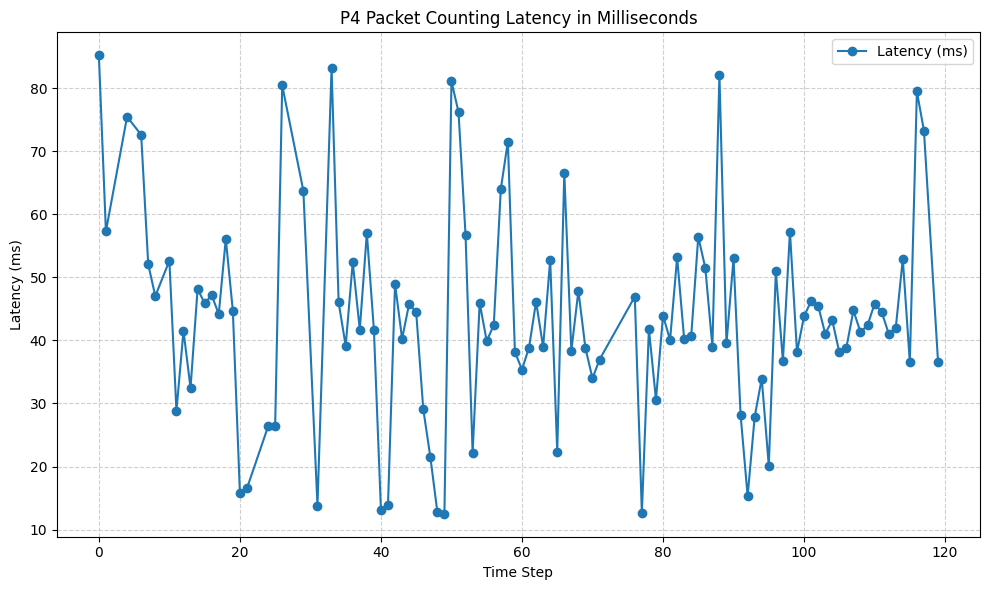

In [58]:
plot_packet_latency(p4_ms, title="P4 Packet Counting Latency in Milliseconds")

In [29]:
p4_ms.mean()

np.float64(41.92567741935484)

In [30]:
p4_ms.var()

np.float64(181.99795104703708)

In [31]:
p4_ms.std()

np.float64(13.490661623769128)